<h1><b>CSE 353:MACHINE LEARNING</b></h1>
<h3><b>PRACTICAL HOMEWORK 3 - USING PYTORCH TO BUILD A CNN</b></h3>


---



**Due date: 11:59pm on December 09, 2024**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This project is an introduction to deep learning tools for Image Processing. You will experiment and train Convolutional Neural Networks (CNN) for image classification using [PyTorch](http://pytorch.org). Specifically, in this assignment, you will experiment with various CNN architectures using PyTorch to classify images from the Fashion MNIST dataset.

You will first explore the architecture of a Simple CNN to understand its key components and what each of them do. You will be introduced to certain terms - convolutional layers, activation functions, pooling layers, etc. - and how they work together to extract features from images. Essentially, you will develop an understanding of how a CNN works.

Your first task will be to implement a basic CNN from scratch, and also understand how each layer processes the input images & data and contributes to the overall performance of the model. You will train your CNN on the Fashion MNIST dataset, which contains greyscale images of clothing items, and evaluate its performance in terms of classification of a test set.

Next, you will explore hyperparameter tuning of CNN models. You will experiment with different architectures of CNNs and observe the resulting effects in model performance.

By the end of this assignment, you are expected to have a solid understanding of how to implement and train CNNs for image classification tasks. This project will prepare you for more advanced deep learning applications, enabling you to tackle real-world computer vision challenges with confidence.


## Some Tutorials (PyTorch)
---
- You will be using PyTorch for deep learning toolbox (follow the [link](http://pytorch.org) for installation).
- For PyTorch beginners, please read this [tutorial](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) before doing your homework.
- Feel free to study more tutorials at http://pytorch.org/tutorials/.
- Find cool visualization here at http://playground.tensorflow.org.



---



---



#Convolutional Neural Network (CNN)
A Convolutional Neural Network (CNN) is a deep learning
model that can automatically and adaptively learn spatial hierarchies of features from input images. This is acieved using layers of convolutions and pooling.

Due to the ability of CNNs in capturing spatial features, they are commonly used for image classification, object detection, and image segmentation.

In this practical, we will be focusing on building a CNN and using it to classify images from the Fashion MNIST dataset.


---



---



<h2><b>SECTION 1: BUILDING A SIMPLE CNN</b></h2>
<h4>[35/100 POINTS]</h4>


---



<b>I. IMPORT LIBRARIES</b>

- Import the PyTorch library and the necessary modules from it for building and training a CNN.
- Additionally, import matplotlib to plot training and validation graphs.


In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt



---



<b>II. LOAD DATASET</b>

We download the pre-split train and test datasets as provided by the FashionMNIST class using the below code.

In [ ]:
# Load the Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.5MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



We split the train dataset into training and validation sets using a 80-20 split

In [ ]:
# split train set into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

**CHECKPOINT 1.1**
<br> First 5 Train Set Images

In [ ]:
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.squeeze().numpy()  # Remove channel dimension and convert to numpy
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

CHECKPOINT 1.1



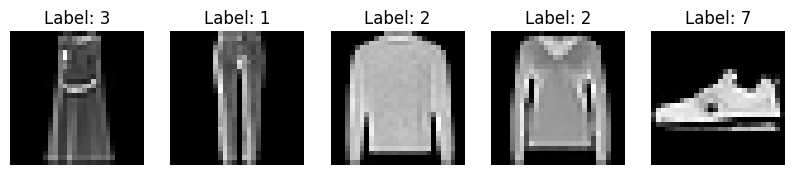

In [ ]:
print("CHECKPOINT 1.1\n")
# Display first 5 images from the train dataset
show_images(train_dataset)

**We** prepare Dataloaders for the train, test, and validation sets

In [ ]:
# define dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



---



<b>III. CNN MODEL</b>

The following is a CNN model with the following architecture:
1. Convolution Layer 1
2. ReLU + Max Pooling Layer 1
3. Flattening
4. Fully Connected Layer 1 with No Activation



```
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolution Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)    # LINE 1

        # Max Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)                  # LINE 2

        # Fully Connected Layer; Output of 10 classes
        self.fc = nn.Linear(32 * 13 * 13, 10)           # LINE 3


    def forward(self, x):
        # 1 Conv + ReLU + Pool layer
        x = self.pool(torch.relu(self.conv1(x)))        # LINE 4

        # Flatten for the FC layer
        x = x.view(-1, self.num_flat_features(x))       # LINE 5

        # Fully Connected Layer with no activation
        x = self.fc(x)                                  # LINE 6

        # Output
        return x


    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
```





---

<br>

In the above code, we define a simple CNN, named "SimpleCNN"

<br><u>We define the following terms</u>
<br>a. Kernel Size:
- The dimension of the kernel matrix
- In LINE 1, Kernel Size is 3
- In LINE 2, Kernel Size is 2
<br>

b. Channel Depth:
- The number of channels/filters applied in the convolution layer
- There are both input and output channels
- In LINE 1, there are 32 output channels
<br>

c. Stride:
- The number of pixels by which the kernel slides over the input at each step
- In LINE 2, Stride is 2
<br>

d. Spatial Dimensions:
- The dimensions of the feature map
- In LINE 3, Spatial Dimension is 13x13


---



**Computing Spatial Dimensions**

In LINE 3, we compute spatial dimension as 13x13 based on the output size of feature map after applying convolution and max-pooling operaions.

The input images of Fashion MNIST are of dimension 28x28

a. LINE 1: Convolutional Layer
- Input size = 28x28
- kernel size = 3x3
- Output size = (28 - 3 + 1) = 26
- Thus, output dimension is 26x26 with 32 channels
<br><br>

b. LINE 2: Max Pooling Layer
- Input size = 26x26
- Kernel Size = 2x2
- Stride = 2
- Output Size = 26/2 = 13
- Thus, output dimension is 13x13 with 32 channels

<br>

--> After Convolution and max-pooling, the feature map dimensions are 32 x 13 x 13
<br>
--> There are 32 x 13 x 13 features which should be input of the fully connected layer
<br>

---



**Implement a CNN Model as described below** (35 POINTS)



a. Define the CNN Model using the following architecture: (10 points)
1. Convolution Layer 1
2. ReLU + Max Pooling Layer 1
3. Convolution Layer 2
4. ReLU + Max Pooling Layer 2
5. Flattening
6. Fully Connected Layer 1 + ReLU Activation
7. Dropout Layer
8. Fully Connected Layer 2

In [ ]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # add layers to CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        # First convolution layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)

        # First Max Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)

        # Second convolution layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)

        # Second Max Pooling Layer
        self.pool2 = nn.MaxPool2d(2, 2)

        # Fully connected layer 1
        self.fc1 = nn.Linear(64 * 5 * 5, 128)

        # Dropout layer
        self.dropout = nn.Dropout(0.5)

        # Second connected layer 2
        self.fc2 = nn.Linear(128, 10)

        ##### ---------- END CODE HERE ---------- #####



    def forward(self, x):
        # construct CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        x = self.pool(torch.relu(self.conv1(x)))

        x = self.pool2(torch.relu(self.conv2(x)))

        x = x.view(-1, self.num_flat_features(x))

        x = torch.relu(self.fc1(x))

        x = self.dropout(x)

        x = self.fc2(x)




        ##### ---------- END CODE HERE ---------- #####

        return x


    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

**CHECKPOINT 1.2**
<br>Print the Model Summary

In [ ]:
print("CHECKPOINT 1.2\n")
model = CNN()
if torch.cuda.is_available():
    model.to('cuda')
summary(model, (1, 28, 28))

CHECKPOINT 1.2

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
         MaxPool2d-2           [-1, 32, 13, 13]               0
            Conv2d-3           [-1, 64, 11, 11]          18,496
         MaxPool2d-4             [-1, 64, 5, 5]               0
            Linear-5                  [-1, 128]         204,928
           Dropout-6                  [-1, 128]               0
            Linear-7                   [-1, 10]           1,290
Total params: 225,034
Trainable params: 225,034
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.28
Params size (MB): 0.86
Estimated Total Size (MB): 1.14
----------------------------------------------------------------



---
<br>

b. Define the method "validate_model" to evaluate the performance of the model on given dataset (test/validation). Return the Validation Loss and Accuracy
<br> (5 points)

In [ ]:
def validate_model(model, dataLoader, lossCriterion):
    # evaluate model on given data and loss criteria (function)
    ##### ---------- INSERT YOUR CODE HERE ---------- #####

    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataLoader:
            outputs = model(images)
            loss = lossCriterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    loss = total_loss / len(dataLoader)
    accuracy = (correct / total) * 100

    ##### ---------- END CODE HERE ---------- #####

    return loss, accuracy



---
<br>

c. Define the method "plot_graphs" to help plot graphs for any metric (Loss, Accuracy) for Train and Validation sets
<br>(5 points)

In [ ]:
# plot graphs
def plot_graphs(train_data, val_data, title, xlabel, ylabel):
    ##### ---------- INSERT YOUR CODE HERE ---------- #####
    plt.figure(figsize=(10, 5))
    plt.plot(train_data, label='Train')
    plt.plot(val_data, label='Validation')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()




    ##### ---------- END CODE HERE ---------- #####

**CHECKPOINT 1.3**
<br>Test Plot-Graphs Method

CHECKPOINT 1.3



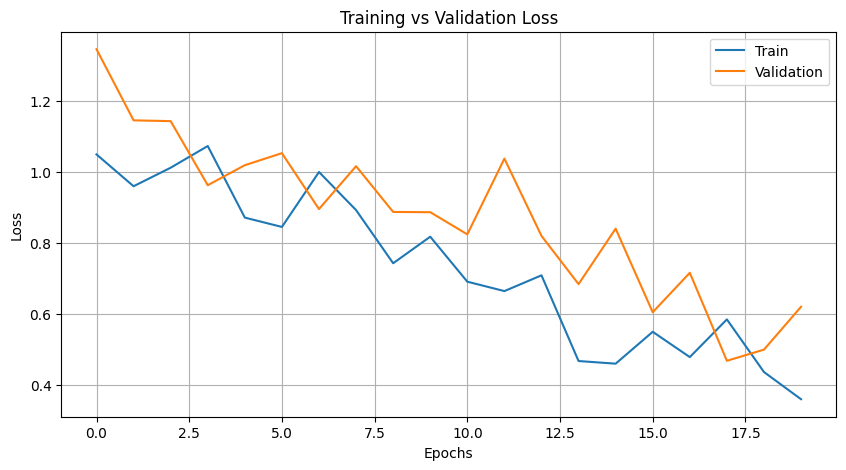

In [ ]:
import numpy as np
np.random.seed(42)

epochs = 20
# Simulate decreasing train loss
train_loss = np.linspace(1, 0.5, epochs) + np.random.normal(0, 0.1, epochs)
# Simulate decreasing val loss
val_loss = np.linspace(1.2, 0.6, epochs) + np.random.normal(0, 0.1, epochs)

print("CHECKPOINT 1.3\n")
# Test the plot_graphs function for loss
plot_graphs(train_loss, val_loss, "Training vs Validation Loss", "Epochs", "Loss")



---

<br>

d. We define the method "train_model" to train the CNN model on the Train Set

For training we,
- Use Cross Entropy Loss
- Use Adam Optimizer
- Train the model for 10 epochs with a learning rate of 0.001

<br>Implement the following:
- Compute the training accuracy and training loss
- Compute the validation accuracy and validation loss
- Report the above metrics for each epoch
- Plot the Train vs. Validation Curves for Accuracy and Loss

<br>(10 points)

In [ ]:
# Train and evaluate the model
def train_model():
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)

    best_val_loss = float('inf')
    epochs = 10
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct_preds, total = 0.0, 0, 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total += labels.size(0)



        #### -------- IMPLEMENT THE FOLLOWING  -------- ####

        # 1. Compute training accuracy
        train_acc = (correct_preds / total) * 100


        # 2. Compute training loss
        train_loss = (running_loss / len(train_loader))


        # 3. Compute validation loss and accuracy using method defined in part b
        # Use val_loader for input data
        val_loss, val_acc = validate_model(model, val_loader, criterion)


        # Save the metrics for plotting accuracy and loss curves
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)


        # 4. Report metrics for each epoch
        print("Metrics")
        ##### ---------- INSERT YOUR CODE HERE ---------- #####
        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        ##### ---------- END CODE HERE ---------- #####


        # Save the model if it has the best validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_fashion_mnist_model.pth")


    # 5. Plot accuracy and loss curves using method defined in part c
    ##### ---------- INSERT YOUR CODE HERE ---------- #####
    plot_graphs(train_losses, val_losses, "Training vs Validation Loss", "Epochs", "Loss")
    plot_graphs(train_accs, val_accs, "Training vs Validation Accuracy", "Epochs", "Accuracy")

    ##### ---------- END CODE HERE ---------- #####

**CHECKPOINT 1.4**
<br>
e. Train the Model

CHECKPOINT 1.4

Metrics
Epoch 1/10: Train Loss: 0.6286, Train Acc: 76.80%, Val Loss: 0.3986, Val Acc: 85.58%
Metrics
Epoch 2/10: Train Loss: 0.4299, Train Acc: 84.43%, Val Loss: 0.3466, Val Acc: 87.17%
Metrics
Epoch 3/10: Train Loss: 0.3676, Train Acc: 86.71%, Val Loss: 0.2879, Val Acc: 89.16%
Metrics
Epoch 4/10: Train Loss: 0.3310, Train Acc: 88.18%, Val Loss: 0.2719, Val Acc: 90.06%
Metrics
Epoch 5/10: Train Loss: 0.3041, Train Acc: 89.10%, Val Loss: 0.2569, Val Acc: 90.25%
Metrics
Epoch 6/10: Train Loss: 0.2846, Train Acc: 89.52%, Val Loss: 0.2467, Val Acc: 90.95%
Metrics
Epoch 7/10: Train Loss: 0.2666, Train Acc: 90.41%, Val Loss: 0.2522, Val Acc: 90.72%
Metrics
Epoch 8/10: Train Loss: 0.2520, Train Acc: 90.81%, Val Loss: 0.2359, Val Acc: 91.22%
Metrics
Epoch 9/10: Train Loss: 0.2372, Train Acc: 91.28%, Val Loss: 0.2414, Val Acc: 91.00%
Metrics
Epoch 10/10: Train Loss: 0.2250, Train Acc: 91.61%, Val Loss: 0.2375, Val Acc: 91.37%


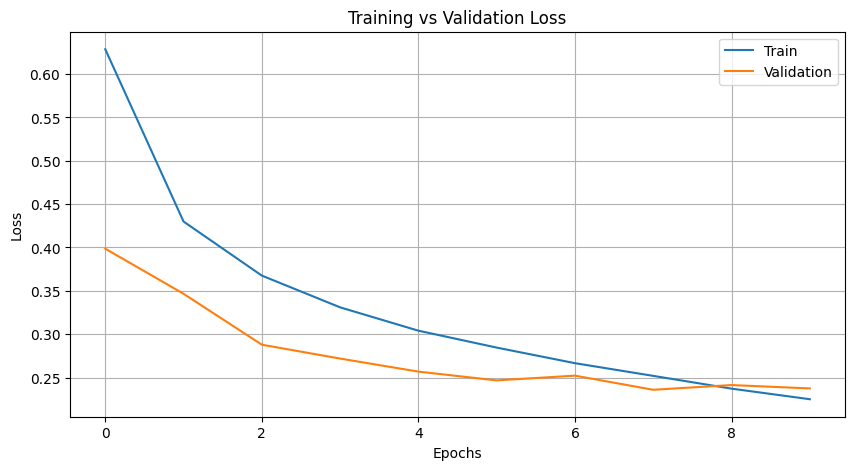

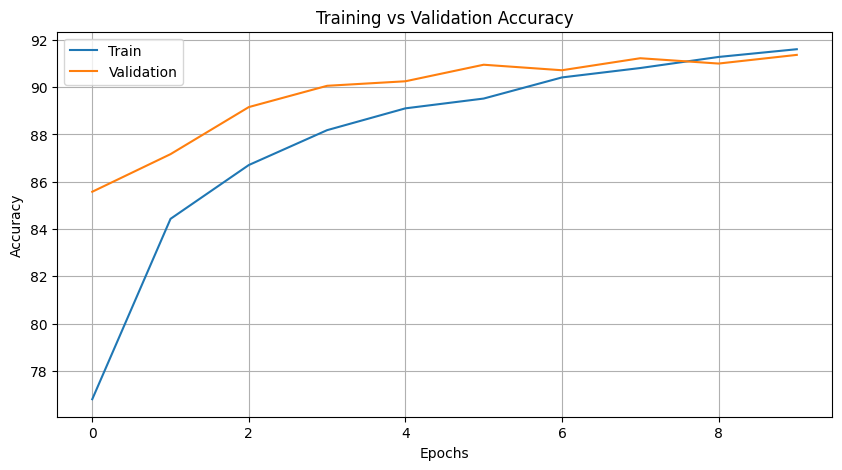

In [ ]:
print("CHECKPOINT 1.4\n")
train_model()



---

<br>

f. Define the method "test_model" to test the trained CNN model on the test set using the saved model.

We report the Test Loss and Accuracy

In [ ]:
# test the best model
def test_model():
    model = CNN()
    model.load_state_dict(torch.load("best_fashion_mnist_model.pth"))

    test_loss, test_acc = validate_model(model, test_loader, nn.CrossEntropyLoss())
    print(f"\nTest Loss: {test_loss:.4f}\nTest Accuracy: {test_acc:.4f}")

**CHECKPOINT 1.5**
<br>
g. Test Model (5 points)
<br>You should get a test accuracy of at least 90% to receive full credit

In [ ]:
print("CHECKPOINT 1.5\n")
test_model()

CHECKPOINT 1.5



<ipython-input-14-cef42319e9f1>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_fashion_mnist_model.pth"))



Test Loss: 0.2560
Test Accuracy: 90.6600




---



---



<h2><b>SECTION 2: HYPERPARAMETER TUNING</b></h2>
<h4>[50/100 POINTS]</h4>


---




Hyperparameter tuning is used to optimize the external settings of a machine learning model to control how it learns. This is achieved by testing different combinations of the hyperparameters to improve model performance.

There are several techniques and libraries available that can help us do this but we will use manual methods for the purpose of learning.

<u>Some hyperparameters you can tune</u>
1. Learning Rate
2. Dropout Rate
3. Batch Size
4. No. of input and output channels in convolution layers
5. Kernel Size
6. No. of neurons in Fully Connected Layer
7. No. of convolution layers
8. Activation functions
9. Optimizer type
10. Regularization Techniques



---



**NOTE**
<br>If you are able to show improved model performance, you will receive an extra credit of 5 points
<br>This applies for all excercises in Section 2


---



<b>I. Modify Architecture - I</b> (25 points)

Train the model on different combinations for the following:
1. No. of input and output channels in convolution layers
2. Kernel Size
3. No. of neurons in fully connected layer
4. Dropout Rate
5. Learning Rate

<br>Note:
- Implement at least 6 different configurations but not more than 10
- Retain the CNN architecture from Section 1 Part III





---


Instead of defining multiple CNN models with different hyperparameters, we can do this using reuse of code.
We define a list of configurations with different combinations of hyperparameters.
<br>

The below is a sample configuration.
Apart from the one given below, add to the list to have at least 6 configurations.

In [ ]:
configs = [
    { "conv1_out_channels": 32, "conv1_kernel": 3, "conv2_out_channels": 64, "conv2_kernel": 3, "fc_units": 64, "dropout": 0.5, "lr": 1e-3},
    {"conv1_out_channels": 64, "conv1_kernel": 3, "conv2_out_channels": 128, "conv2_kernel": 3, "fc_units": 128, "dropout": 0.4, "lr": 1e-3},
    {"conv1_out_channels": 16, "conv1_kernel": 5, "conv2_out_channels": 32, "conv2_kernel": 5, "fc_units": 64, "dropout": 0.3, "lr": 5e-3},
    {"conv1_out_channels": 32, "conv1_kernel": 3, "conv2_out_channels": 64, "conv2_kernel": 3, "fc_units": 256, "dropout": 0.5, "lr": 5e-4},
    {"conv1_out_channels": 32, "conv1_kernel": 3, "conv2_out_channels": 64, "conv2_kernel": 3, "fc_units": 32, "dropout": 0.2, "lr": 1e-3},
    {"conv1_out_channels": 128, "conv1_kernel": 3, "conv2_out_channels": 256, "conv2_kernel": 3, "fc_units": 128, "dropout": 0.0, "lr": 1e-4},
    {"conv1_out_channels": 16, "conv1_kernel": 3, "conv2_out_channels": 32, "conv2_kernel": 3, "fc_units": 32, "dropout": 0.6, "lr": 1e-3},
]



---


We can now instantiate a CNN model for each configuration which is passed as a parameter 'config' seen in LINE 1 below

a) Modify the CNN Model (5 points)

In [ ]:
# Modified CNN with hyperparameter arguments for tuning
class CNNHyperTune(nn.Module):
    def __init__(self, config):    # LINE 1
        super(CNNHyperTune, self).__init__()

        # add layers to CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        self.conv1 = nn.Conv2d(1, config['conv1_out_channels'], kernel_size=config['conv1_kernel'])
        self.conv2 = nn.Conv2d(config['conv1_out_channels'], config['conv2_out_channels'], kernel_size=config['conv2_kernel'])

        self.pool = nn.MaxPool2d(2, 2)

        # Spatial Dimension Computation for Input to Fully Connected Layer 1
        dummy_input = torch.zeros(1, 1, 28, 28)
        self.flattened_size = self._get_flattened_size(dummy_input)
        # Use "self.flattened_size" as input to fc1

        self.fc1 = nn.Linear(self.flattened_size, config['fc_units'])
        self.fc2 = nn.Linear(config['fc_units'], 10)

        self.dropout = nn.Dropout(config['dropout'])

        ##### ---------- END CODE HERE ---------- #####



    def forward(self, x):
        # construct CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####
        x = torch.relu(self.conv1(x))
        x = self.pool(x)

        x = torch.relu(self.conv2(x))
        x = self.pool(x)

        x = x.view(-1, self.flattened_size)

        x = torch.relu(self.fc1(x))

        x = self.dropout(x)

        x = self.fc2(x)



        ##### ---------- END CODE HERE ---------- #####


        return x

    def _get_flattened_size(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        return x.numel()


**CHECKPOINT 2.1**
<br>Print Model Summary of Given Configuration

In [ ]:
print("CHECKPOINT 2.1\n")
model = CNNHyperTune(configs[0])
if torch.cuda.is_available():
    model.to('cuda')
summary(model, (1, 28, 28))

CHECKPOINT 2.1

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
         MaxPool2d-2           [-1, 32, 13, 13]               0
            Conv2d-3           [-1, 64, 11, 11]          18,496
         MaxPool2d-4             [-1, 64, 5, 5]               0
            Linear-5                   [-1, 64]         102,464
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 10]             650
Total params: 121,930
Trainable params: 121,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.28
Params size (MB): 0.47
Estimated Total Size (MB): 0.75
----------------------------------------------------------------




---




b) Define the method to train the new CNN Model (5 points)

- Report the Loss and Accuracy for the train and validation sets for each epoch

In [ ]:
# Train the model and return the results
# Use training function from Section 1 as reference
def train_hyperTune_model(model, criterion, optimizer, epochs=10):

    ##### ---------- INSERT YOUR CODE HERE ---------- #####
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    # Loop over the number of epochs
    for epoch in range(epochs):
        model.train()
        running_loss, correct_preds, total = 0.0, 0, 0

        # Training loop
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = (correct_preds / total) * 100

        val_loss, val_acc = validate_model(model, val_loader, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # Print metrics for the current epoch
        print(f"Epoch [{epoch + 1}/{epochs}] - "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}% - "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")




    ##### ---------- END CODE HERE ---------- #####

    return train_losses, val_losses, train_accs, val_accs



---


c) Define the method to perform Hyperparameter tuning (10 points)

- Save the best hyperparamters
- Save the model with the best hyperparameters

In [ ]:
# Function to perform hyperparameter tuning
def hyperparameter_tuning():

    ##### ---------- INSERT YOUR CODE HERE ---------- #####

    best_val_acc = 0
    best_hyperparams = None
    best_model = None

    for config in configs:
        print(f"Training with configuration: {config}")

        model = CNNHyperTune(config)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=config['lr'])

        train_losses, val_losses, train_accs, val_accs = train_hyperTune_model(model, criterion, optimizer, epochs=10)
        final_val_acc = val_accs[-1]

        if final_val_acc > best_val_acc:
            best_val_acc = final_val_acc
            best_hyperparams = config
            best_model = model

            torch.save(model.state_dict(), "best_model_hyper_tune.pth")

        print(f"Finished training with configuration: {config}")
        print(f"Validation Accuracy: {final_val_acc:.2f}%\n")


    ##### ---------- END CODE HERE ---------- #####

    return best_hyperparams

d) Perform Hyperparameter Tuning

In [ ]:
best_hyper_params = hyperparameter_tuning()

Training with configuration: {'conv1_out_channels': 32, 'conv1_kernel': 3, 'conv2_out_channels': 64, 'conv2_kernel': 3, 'fc_units': 64, 'dropout': 0.5, 'lr': 0.001}
Epoch [1/10] - Train Loss: 0.7311, Train Accuracy: 73.17% - Val Loss: 0.4346, Val Accuracy: 83.86%
Epoch [2/10] - Train Loss: 0.5213, Train Accuracy: 81.19% - Val Loss: 0.3625, Val Accuracy: 87.16%
Epoch [3/10] - Train Loss: 0.4536, Train Accuracy: 83.54% - Val Loss: 0.3191, Val Accuracy: 88.65%
Epoch [4/10] - Train Loss: 0.4130, Train Accuracy: 85.25% - Val Loss: 0.3124, Val Accuracy: 88.83%
Epoch [5/10] - Train Loss: 0.3894, Train Accuracy: 86.01% - Val Loss: 0.2870, Val Accuracy: 89.56%
Epoch [6/10] - Train Loss: 0.3624, Train Accuracy: 86.92% - Val Loss: 0.2904, Val Accuracy: 89.06%
Epoch [7/10] - Train Loss: 0.3448, Train Accuracy: 87.62% - Val Loss: 0.2732, Val Accuracy: 89.83%
Epoch [8/10] - Train Loss: 0.3280, Train Accuracy: 88.23% - Val Loss: 0.2593, Val Accuracy: 90.64%
Epoch [9/10] - Train Loss: 0.3108, Train Ac

**CHECKPOINT 2.2**
<br>Report Best Configuration of Hyperparameters

In [ ]:
print("CHECKPOINT 2.2\n")
print(f"Best Hyperparameters: {best_hyper_params}")

CHECKPOINT 2.2

Best Hyperparameters: {'conv1_out_channels': 64, 'conv1_kernel': 3, 'conv2_out_channels': 128, 'conv2_kernel': 3, 'fc_units': 128, 'dropout': 0.4, 'lr': 0.001}




---


e) Define the method to test the CNN Model with the best hyperparameters

- Use the saved CNN Model from the previous section
- Report the test loss and accuracy

In [ ]:
def test_best_model():
    best_model = CNNHyperTune(best_hyper_params)
    best_model.load_state_dict(torch.load("best_model_hyper_tune.pth"))

    test_loss, test_acc = validate_model(best_model, test_loader, nn.CrossEntropyLoss())
    print("Test Results - Manually Tuned Hyperparameters\n")
    print(f"Test Loss: {test_loss:.4f}\nTest Accuracy: {test_acc:.4f}")

**CHECKPOINT 2.3**
<br>
f) Test the CNN with best hyperparameters
(Extra Credit: 5 points)

In [ ]:
print("CHECKPOINT 2.3\n")
test_best_model()

CHECKPOINT 2.3



<ipython-input-42-21bcf412dfca>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_model_hyper_tune.pth"))


Test Results - Manually Tuned Hyperparameters

Test Loss: 0.2538
Test Accuracy: 91.5200




---


<b>Q. What effect does the above hyperparameter tuning offer? Note your observations.</b> (5 points)

<u>Answer</u>
When you iterate over the configs to find the one that yields the lowest validation loss, you find the best hyperparameters that make the model generalize to new data. From observations the tuned model on the hyperparameter performed better from the original model. When finding the best hyperparameter, at each config the model accuracy decreased. This config did the worse, {'conv1_out_channels': 16, 'conv1_kernel': 5, 'conv2_out_channels': 32, 'conv2_kernel': 5, 'fc_units': 64, 'dropout': 0.3, 'lr': 0.005}. It is hard to pin point what specific setting makes the model to well or worse.

Having a moderate dropout rates helped to prevent overfitting and a learning rate of 0.005 ensured stable training.



---



---



<b>II. Modify Architecture - II</b> (25 points)

Make the following changes to the CNN Architecture:
1. Change the number of convolutional layers
2. Use a different activation function
3. Use a different optimizer

- Report loss and accuracy on the train and validation sets for each epoch
- Plot the Train vs. Validation Curves for Accuracy and Loss
- Evaluate the model on the test set and report the test loss and accuracy.




---


Print the following Checkpoints to show your progress:

**Checkpoint 2.4:**
<br>Model summary

**Checkpoint 2.5:**
<br>Per epoch loss and accuracy on the train and validation sets

**Checkpoint 2.6:**
<br>Train vs. Validation Curves for Accuracy and Loss

**Checkpoint 2.7:**
<br>Test Loss and Test Accuracy


---



a. Modified Architecture (10 points)

In [ ]:
# Modified CNN - Architecture
# use 3 con layer
# leakyrelu
# SGD instead of adam

class CNNHyperTuneArch(nn.Module):
    def __init__(self):
        super(CNNHyperTuneArch, self).__init__()
        # add layers to CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool3 = nn.MaxPool2d(2, 2)

        self.activation = nn.LeakyReLU(negative_slope=0.01)

        self.fc1 = nn.Linear(128 * 1 * 1, 128)

        self.dropout = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 10)

        self.flattened_size = self._get_flattened_size(torch.zeros(1, 1, 28, 28))

        ##### ---------- END CODE HERE ---------- #####


    def forward(self, x):
        # construct CNN model
        ##### ---------- INSERT YOUR CODE HERE ---------- #####

        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool2(self.activation(self.conv2(x)))
        x = self.pool3(self.activation(self.conv3(x)))

        x = x.view(-1, self.flattened_size)

        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


    def _get_flattened_size(self, x):
        # redefine method to work for your architecture
        ##### ---------- INSERT YOUR CODE HERE ---------- #####
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool2(self.activation(self.conv2(x)))
        x = self.pool3(self.activation(self.conv3(x)))
        ##### ---------- END CODE HERE ---------- #####
        return x.numel()

In [ ]:
print("CHECKPOINT 2.4\n")
model = CNNHyperTuneArch()
summary(model, (1, 28, 28))

CHECKPOINT 2.4

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
         LeakyReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
         LeakyReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
         LeakyReLU-8            [-1, 128, 3, 3]               0
         MaxPool2d-9            [-1, 128, 1, 1]               0
           Linear-10                  [-1, 128]          16,512
        LeakyReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 10]           1,290
Total params: 110,474
T

b. Training Function (10 points)

In [ ]:
# Train the model and return the results
# Use training function from Section 1 as reference
def train_hyperTune_Arch():
    print("Checkpoint 2.5\n")

    model = CNNHyperTuneArch()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    best_val_loss = float('inf')
    epochs = 10
    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct_preds, total = 0.0, 0, 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct_preds += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = (correct_preds / total) * 100
        train_loss = (running_loss / len(train_loader))
        val_loss, val_acc = validate_model(model, val_loader, criterion)


        # Save the metrics for plotting accuracy and loss curves
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print("Metrics")
        ##### ---------- INSERT YOUR CODE HERE ---------- #####
        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Save the model if it has the best validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_modified_hyper_tuned_fashion_model.pth")

    # 5. Plot accuracy and loss curves
    print("Checkpoint 2.6\n")
    plot_graphs(train_losses, val_losses, "Training vs Validation Loss", "Epochs", "Loss")
    plot_graphs(train_accs, val_accs, "Training vs Validation Accuracy", "Epochs", "Accuracy")





Checkpoint 2.5

Metrics
Epoch 1/10: Train Loss: 0.8911, Train Acc: 67.03%, Val Loss: 0.5340, Val Acc: 79.47%
Metrics
Epoch 2/10: Train Loss: 0.5339, Train Acc: 80.50%, Val Loss: 0.4711, Val Acc: 82.72%
Metrics
Epoch 3/10: Train Loss: 0.4518, Train Acc: 83.52%, Val Loss: 0.4064, Val Acc: 84.72%
Metrics
Epoch 4/10: Train Loss: 0.4040, Train Acc: 85.50%, Val Loss: 0.3659, Val Acc: 86.39%
Metrics
Epoch 5/10: Train Loss: 0.3698, Train Acc: 86.57%, Val Loss: 0.3701, Val Acc: 86.04%
Metrics
Epoch 6/10: Train Loss: 0.3392, Train Acc: 87.84%, Val Loss: 0.3254, Val Acc: 87.80%
Metrics
Epoch 7/10: Train Loss: 0.3187, Train Acc: 88.34%, Val Loss: 0.3362, Val Acc: 87.67%
Metrics
Epoch 8/10: Train Loss: 0.2973, Train Acc: 89.16%, Val Loss: 0.3067, Val Acc: 88.82%
Metrics
Epoch 9/10: Train Loss: 0.2760, Train Acc: 89.85%, Val Loss: 0.3501, Val Acc: 87.04%
Metrics
Epoch 10/10: Train Loss: 0.2625, Train Acc: 90.35%, Val Loss: 0.3021, Val Acc: 88.52%
Checkpoint 2.6



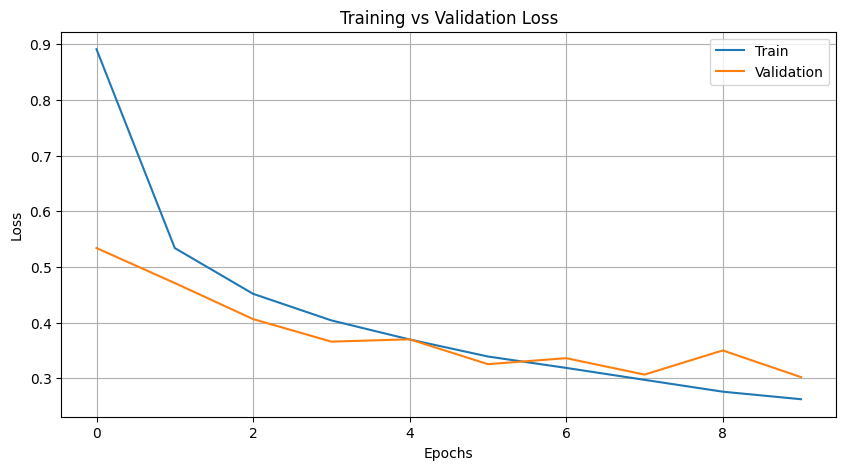

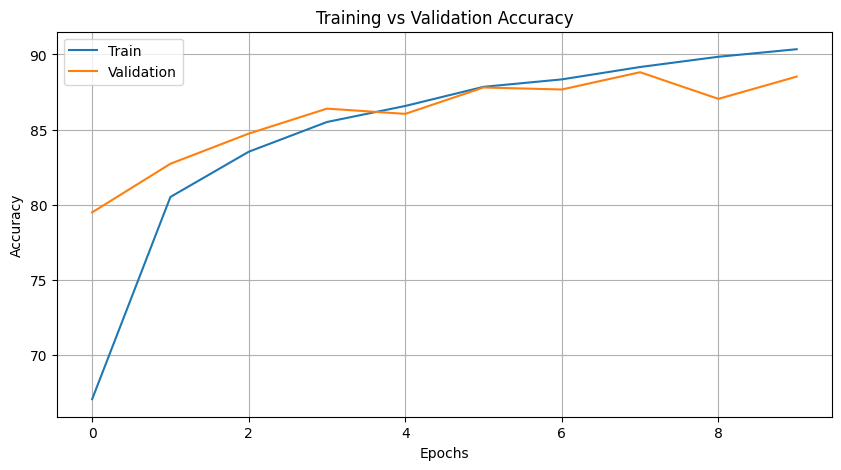

In [ ]:
train_hyperTune_Arch()

c. Test Model (Extra Credit: 5 points)

In [ ]:
# test the best model
def test_hyperTune_Arch():
    model = CNNHyperTuneArch()
    model.load_state_dict(torch.load("best_modified_hyper_tuned_fashion_model.pth"))

    test_loss, test_acc = validate_model(model, test_loader, nn.CrossEntropyLoss())
    print(f"\nTest Loss: {test_loss:.4f}\nTest Accuracy: {test_acc:.4f}")

In [ ]:
print("CHECKPOINT 2.7\n")
test_hyperTune_Arch()

CHECKPOINT 2.7



<ipython-input-48-8d8095f06125>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_modified_hyper_tuned_fashion_model.pth"))



Test Loss: 0.3237
Test Accuracy: 88.3100




---


<b>Q. How does this model perform in comparision to the other two? Note your observations and findings.</b> (5 points)

<u>Answer</u>

This model did terrible compared to the other 2. The test loss is higher with 0.3237 and a test accuracy of 88%. This could be due to the  overfitting of the model to the training data, inadequate network architecture for the task, or insufficient regularization. Also, the choice of hyperparameters such as learning rate or batch size might not have been optimal, affecting the model's ability to generalize well on unseen data.




---



---



<h2><b>SECTION 3: THEORY</b></h2>
<h4>[15/100 POINTS]</h4>


---



<b>Q. What are activation functions? How does ReLU work?</b> (5 points)

<u>Answer</u>

Activation functions in neural networks decide whether a neuron should be activated or not. This brings non-linearity to the system so it can handle more complex functions.

Recitified Linear Unit is very popular and it works by giving an output directly from the input if positive otherwise it would output 0. This is the simple explanation, and a downside to the RELU is that it can stop responding entirely known as the dying relu

<b>Q.What are optimizers and what do they do? What does Adam Optimizer do?</b> (5 points)

<u>Answer</u>

Optimizers are tools used in neural networks to minimize or maximize functions, usually is loss functions, which is to see the error between the predicted output and the actual output. Optimizer make adjustments to the weights so that it can minimize loss.

Adam Optimizer, uses squared gradients to scale the learning rate. It also uses momentum from the moving average of the gradient. This optimizer is effective for larger datasets and high dimentionality.

<b>Q. What does regularization do and how would it help our CNN model?</b> (5 points)

<u>Answer</u>

Regularization is a technique to prevent a model from overfitting to the training data. Which results in the model doing well at unseen data.

For our CNN model, regularization can help the model become less complex and make the performance of predicting on unseen data more accurate.



---



---

## Submission guidelines
---
Download the .ipynb file to a folder of your preference. All you need to do is to fill in the blanks as indicated.

When submitting your .zip file through brightspace, please
-- name your .zip file as **Surname_Givenname_SBUID_hw3.zip**.

This zip file should include:
```
Surname_Givenname_SBUID_hw*
        |---Surname_Givenname_SBUID_hw#*.ipynb
        |---Surname_Givenname_SBUID_hw#*.pdf
```

For instance, student Bill Gates should submit a zip file named "Gates_Bill_111134567_hw3.zip" for homework3 in this structure:
```
Gates_Bill_111134567_hw3
        |---Gates_Bill_111134567_hw3.ipynb
        |---Gates_Bill_111134567_hw3.pdf
```

The **Surname_Givenname_SBUID_hw#*.pdf** should only include a **google shared link**. To generate the **google shared link**, first create a folder named **Surname_Givenname_SBUID_hw#*** in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter TA's emails: **draghuraman@cs.stonybrook.edu**. Make sure that TA ***Deepshika Raghuraman*** has the link and **can edit**, ***not just*** **view**, and also **uncheck** the **Notify people** box.

Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in blackboard is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in blackboard.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues. Also feel free to drop by the TAs office hours.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

---
---


<h2><b>RESOURCES</b></h2>

Here are some resources that you can look at if you want to learn more about CNNs and Deep Learning in general:<br><br>

<u>Understanding CNNs - A Keras Implementation</u>
<br>
https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial
<br><br>

<u>CNN Binary Image Classification using PyTorch - A Detailed Guide</u>
<br>
https://www.kaggle.com/code/shtrausslearning/pytorch-cnn-binary-image-classification/notebook
<br><br>


<u>PyTorch Tutorial for Deep Learning</u>
<br>
https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers/notebook
<br><br>

<u>A Guide on How to Choose CNN Architecture</u>
<br>
https://www.kaggle.com/code/cdeotte/how-to-choose-cnn-architecture-mnist